In [18]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
plt.set_cmap('jet')
plt.rcParams['font.size'] =14

<Figure size 432x288 with 0 Axes>

In [3]:
import sys
sys.path.append("../src")

In [4]:
from utils import load_model

In [2]:
# Define dimensions
ntest = 200
nx, ny, nz = 60, 60, 40

In [5]:
data_dir = './data'

#### 1. Load Models

In [13]:
# Load Petrel models
facies_petrel = load_model(os.path.join(data_dir, 'facies_petrel_test200_case3.h5'))
logk_sand_petrel = load_model(os.path.join(data_dir, 'logksand_petrel_test200_case3.h5'))
logk_mud_petrel = load_model(os.path.join(data_dir, 'logkmud_petrel_test200_case3.h5'))

In [14]:
# Load PCA models
facies_cnnpca = load_model(os.path.join(data_dir, 'facies_cnnpca_test200_case3.h5'))
logk_sand_pca = load_model(os.path.join(data_dir, 'logksand_mpca_test200_case3.h5'))
logk_mud_pca = load_model(os.path.join(data_dir, 'logkmud_mpca_test200_case3.h5'))

#### 2. Cookie Cutter

In [17]:
# Cookie cutter
m_petrel = logk_sand_petrel * facies_petrel + logk_mud_petrel * (1-facies_petrel)

In [16]:
# Cookie cutter
m_cnnpca = logk_sand_pca * facies_cnnpca + logk_mud_pca * (1-facies_cnnpca)

#### 3. Plot Histogram

In [21]:
count_petrel, bins_petrel = np.histogram(m_petrel.flatten(), 31)
count_cnnpca, bins_cnnpca = np.histogram(m_cnnpca.flatten(), 31)

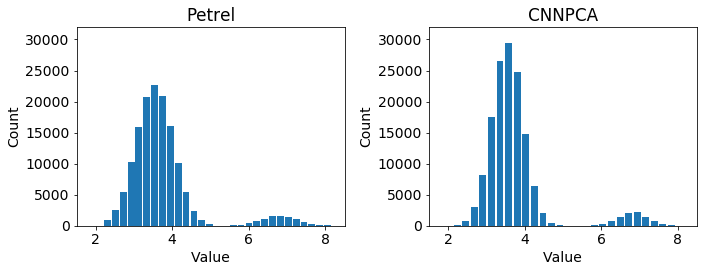

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar((bins_petrel[:-1] + bins_petrel[1:]) / 2, count_petrel // 200, width=0.18)
plt.xlim([1.5, 8.5])
plt.ylim([0, 32000])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title("Petrel")
plt.subplot(1,2,2)
plt.bar((bins_cnnpca[:-1] + bins_cnnpca[1:]) / 2, count_cnnpca // 200, width=0.18)
plt.xlim([1.5, 8.5])
plt.ylim([0, 32000])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title("CNNPCA")
plt.tight_layout()
plt.show()

In [26]:
# Define well locations
well_loc = {}
well_loc['I1'] = (15, 2)
well_loc['I2'] = (45, 3)
well_loc['P1'] = (13, 57)
well_loc['P2'] = (43, 58)

In [27]:
def plot_wells(c='k'):
    for wn in well_loc:
        wloc = well_loc[wn]
        plt.plot(wloc[0]-1, wloc[1]-1, c+'.')
        plt.text(wloc[0]+1, wloc[1]+1, wn, color=c)

In [33]:
m_petrel.shape

(200, 40, 60, 60, 1)

Model 1


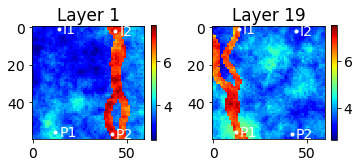

Model 2


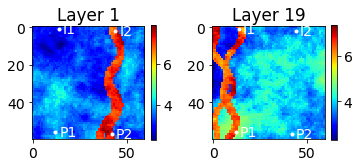

In [35]:
# Plot some Petrel models
layers = [0, 18]
nz = len(layers)
for k in range(2):
    print('Model %d' % (k+1))
    plt.figure(figsize=(10,5))
    for ind, z in enumerate(layers):
        plt.subplot(1,4,ind+1)
        plt.imshow(m_petrel[k, z, :, :, 0].astype(np.double))
        plot_wells('w')
        plt.colorbar(fraction=0.046)
        plt.title('Layer %d' % (z+1))        
    plt.tight_layout()
    plt.show()

Model 1


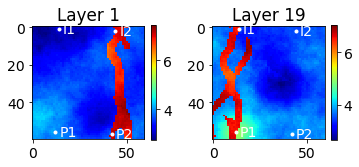

Model 2


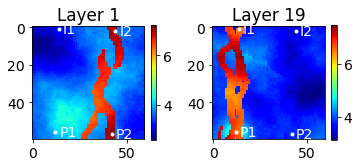

In [36]:
# Plot some CNNPCA models
layers = [0, 18]
nz = len(layers)
for k in range(2):
    print('Model %d' % (k+1))
    plt.figure(figsize=(10,5))
    for ind, z in enumerate(layers):
        plt.subplot(1,4,ind+1)
        plt.imshow(m_cnnpca[k, z, :, :, 0].astype(np.double))
        plot_wells('w')
        plt.colorbar(fraction=0.046)
        plt.title('Layer %d' % (z+1))        
    plt.tight_layout()
    plt.show()